In [1]:
##############################################################################
## EE559 Final Project ===> Mushroom Classification.
## Created by Sudesh Kumar Santhosh Kumar and Thejesh Chandar Rao.
## Date: 6th May, 2023
## Tested in Python 3.10.9 using conda environment version 22.9.0.
##############################################################################

# Final Project -> Classification of Mushrooms (EE - 559)

## Feature Engineering and Data Cleansing

# Importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.Encoding import StatisticalEncoding

## Loading the dataset

In [3]:
train_data = pd.read_csv("./dataset/mushroom_train.csv")
print("Train Data -> 1: ")
train_data.head()


Train Data -> 1: 


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
0,4.98,c,i,y,f,a,c,n,6.04,6.21,w,f,f,d,a,p
1,2.84,x,y,y,f,a,c,w,5.66,3.55,y,t,r,h,u,p
2,11.44,x,y,y,f,a,c,w,7.03,25.29,n,t,e,d,w,e
3,8.77,s,t,r,t,d,c,g,4.44,13.61,r,f,f,d,a,p
4,7.55,x,d,n,t,p,c,y,8.41,18.44,y,f,f,d,a,e


In [4]:
X_train = train_data.drop('class', axis=1)  # Select all the features except labels,
y_train = train_data['class']  # Select only the 'class' column.

In [5]:
categoricalFeatures = [col for col in X_train.columns if X_train[col].dtype == "object"]
numericalFeatures = [col for col in X_train.columns if X_train[col].dtype == "float64"]

classes, class_index, class_count = np.unique(y_train, return_index=True, return_counts=True, axis=None)

## Initial Observations

### General Information about the Data

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          42748 non-null  float64
 1   cap-shape             42748 non-null  object 
 2   cap-surface           42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       42748 non-null  object 
 6   gill-spacing          42748 non-null  object 
 7   gill-color            42748 non-null  object 
 8   stem-height           42748 non-null  float64
 9   stem-width            42748 non-null  float64
 10  stem-color            42748 non-null  object 
 11  has-ring              42748 non-null  object 
 12  ring-type             42748 non-null  object 
 13  habitat               42748 non-null  object 
 14  season                42748 non-null  object 
dtypes: float64(3), obje

In [7]:
print("##### Initial Observations from the data ######")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print(f"Shape of the Train Data: {train_data.shape}")
print(f"Total number of Data-Points in the Train Data, N: {train_data.shape[0]}")
print(f"Total number of dimesions in the Train Data, D: {train_data.shape[1]}")

print()

print(f"Categorical Features: {categoricalFeatures}")
print(f"Numerical Features: {numericalFeatures}")
print(f"Total number of Categorical Features: {len(categoricalFeatures)}")
print(f"Total number of Numerical Features: {len(numericalFeatures)}")

print()

print(f"Total number of classes in the Dataset, C: {len(classes)}")
print(f"Output Labels in the Train Data, T: {classes}")
print(f"Total Number of data-points corressponding to each class: { dict(zip(classes, class_count))}")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

##### Initial Observations from the data ######
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Shape of the Train Data: (42748, 16)
Total number of Data-Points in the Train Data, N: 42748
Total number of dimesions in the Train Data, D: 16

Categorical Features: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']
Numerical Features: ['cap-diameter', 'stem-height', 'stem-width']
Total number of Categorical Features: 12
Total number of Numerical Features: 3

Total number of classes in the Dataset, C: 2
Output Labels in the Train Data, T: ['e' 'p']
Total Number of data-points corressponding to each class: {'e': 19153, 'p': 23595}
-----------------------------------------------------------------------------------------------------------

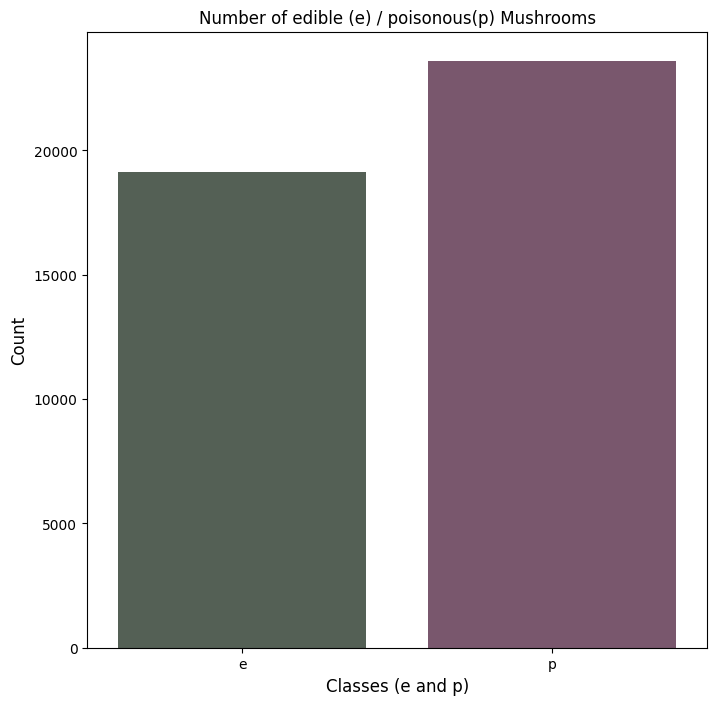

In [8]:
plt.figure(figsize=(8,8))
sns.barplot(x=classes, y=class_count, alpha=0.8, palette=["#263A29", "#5F264A"])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Classes (e and p)', fontsize=12)
plt.title("Number of edible (e) / poisonous(p) Mushrooms")

plt.show()

### Checking for null values in the input features.


In [9]:
train_data.isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
class                   0
dtype: int64

### Checking the number of unique values in every single input feature.

In [10]:
train_data.nunique(axis=0)


cap-diameter            2390
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2079
stem-width              4261
stem-color                13
has-ring                   2
ring-type                  8
habitat                    8
season                     4
class                      2
dtype: int64

### Checking for duplicate rows in the input feature space.

In [11]:
duplicate_rows = train_data.duplicated()
train_data[duplicate_rows]


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,class
2586,3.23,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,u,p
6909,4.41,o,s,g,f,f,f,f,0.0,0.0,f,t,f,d,s,p
8004,2.88,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,s,p
11144,3.06,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,a,p
12012,2.93,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,a,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41759,3.03,o,l,g,f,f,f,f,0.0,0.0,f,f,f,d,u,p
41835,4.59,o,s,w,f,a,c,w,0.0,0.0,f,f,f,d,u,p
41850,3.83,o,t,n,f,a,c,w,0.0,0.0,f,f,f,d,u,p
42323,3.91,o,s,w,f,a,c,w,0.0,0.0,f,f,f,d,a,p


### Analysing the  Input Features which are Numerical.

In [12]:
train_data.describe()


,cap-diameter,stem-height,stem-width
count,42748.000000,42748.000000,42748.000000
mean,6.714149,6.583224,12.117692
std,5.220008,3.368333,10.004874
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.180000
50%,5.865000,5.960000,10.200000
75%,8.530000,7.750000,16.540000
max,62.340000,33.920000,103.910000


### Plotting a sub-plot of Frequency of categories present in the Categorical Features.

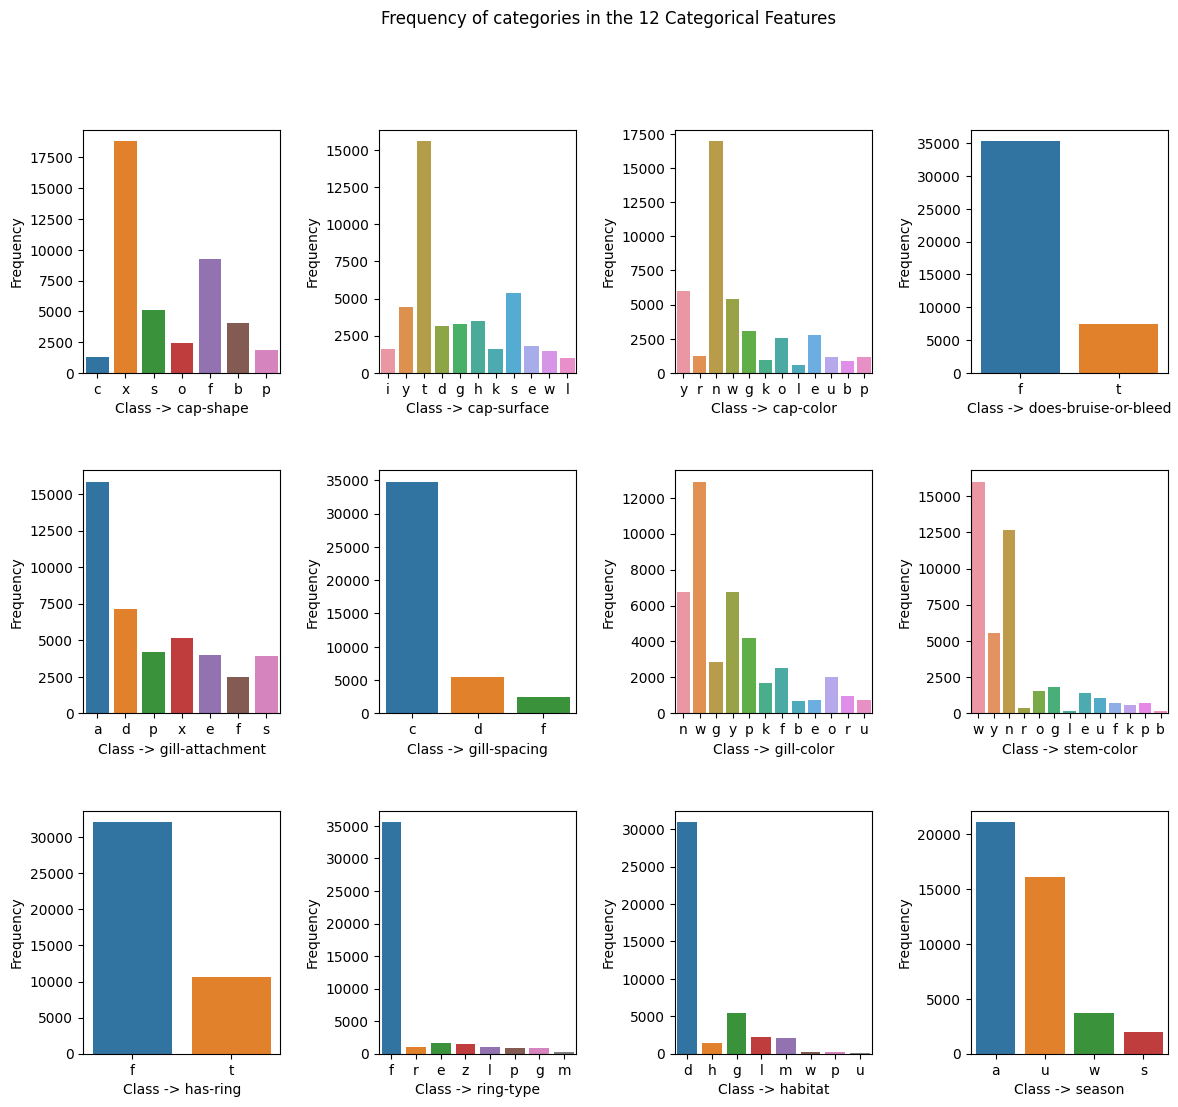

In [13]:
# Set up the grid of subplots
nrows = 3
ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 12))

# Iterate over the categorical features and plot a countplot for each one
for i, feature in enumerate(categoricalFeatures):
    row_idx = i // ncols  # row index of the subplot in the grid
    col_idx = i % ncols   # column index of the subplot in the grid
    
    freq_table = pd.crosstab(index=train_data[feature], columns=feature)
    sns.countplot(data=train_data, x=feature, ax=axs[row_idx, col_idx])
    axs[row_idx, col_idx].set_ylabel('Frequency')
    axs[row_idx, col_idx].set_xlabel(f"Class -> {feature}")


# Set the overall title of the figure
fig.suptitle('Frequency of categories in the 12 Categorical Features')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.4)

plt.show()

In [14]:
print("No missing data was present in the Train Data!")
print(f"Total number of duplicate records in the Train Data: {train_data.duplicated().sum()} records")

No missing data was present in the Train Data!
Total number of duplicate records in the Train Data: 88 records


## Data Cleaning

### Removing Duplicate records from the DataFrame

In [15]:
# Drop duplicate rows
train_data = train_data.drop_duplicates()

# Updating X_train and y_train.
X_train = train_data.drop('class', axis=1)  # Select all the features except labels,
y_train = train_data['class']  # Select only the 'class' column.

print(f"Shape of Training Data after Dropping Duplicate Rows: {train_data.shape}")
print(f"Number of Data-Points before removing duplicate records: {train_data.shape[0] + 88} records")
print(f"Number of Data-Points after removing duplicate records: {train_data.shape[0]} records")

Shape of Training Data after Dropping Duplicate Rows: (42660, 16)
Number of Data-Points before removing duplicate records: 42748 records
Number of Data-Points after removing duplicate records: 42660 records


## Visualizing the Data-Points in Feature Space with Class Labels

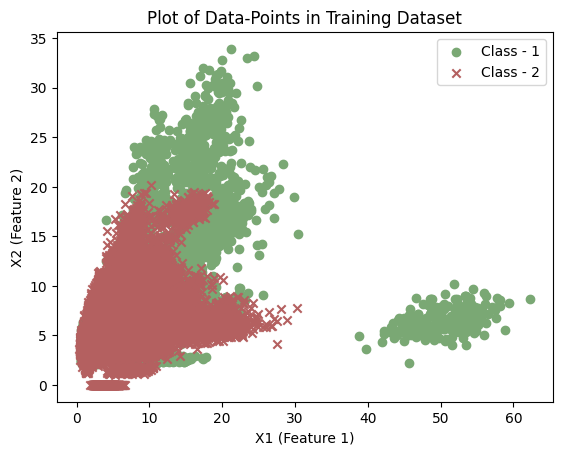

In [16]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

mask = y_train_np == "e"

plt.scatter(X_train_np[mask, 0], X_train_np[mask, 8], c='#7AA874', marker = "o", label='Class - 1')
plt.scatter(X_train_np[~mask, 0], X_train_np[~mask, 8], c='#B46060', marker = "x", label='Class - 2')

# Add legend to the plot
plt.legend()

# Added a Title.
plt.title("Plot of Data-Points in Training Dataset")

# Setting the X and Y Axes.
plt.xlabel("X1 (Feature 1)")
plt.ylabel("X2 (Feature 2)")

# Display the plot
plt.show()


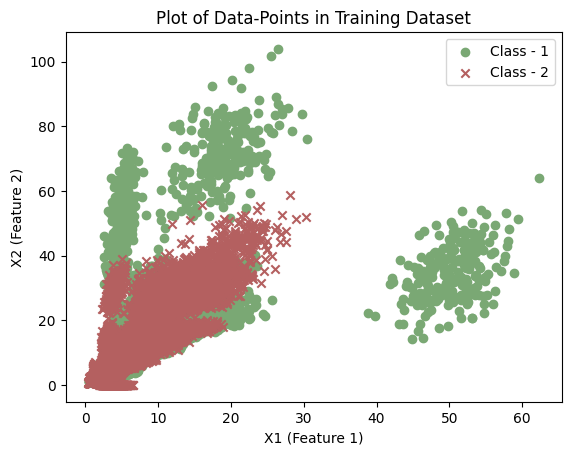

In [17]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

mask = y_train_np == "e"

plt.scatter(X_train_np[mask, 0], X_train_np[mask, 9], c='#7AA874', marker = "o", label='Class - 1')
plt.scatter(X_train_np[~mask, 0], X_train_np[~mask, 9], c='#B46060', marker = "x", label='Class - 2')

# Add legend to the plot
plt.legend()

# Added a Title.
plt.title("Plot of Data-Points in Training Dataset")

# Setting the X and Y Axes.
plt.xlabel("X1 (Feature 1)")
plt.ylabel("X2 (Feature 2)")

# Display the plot
plt.show()


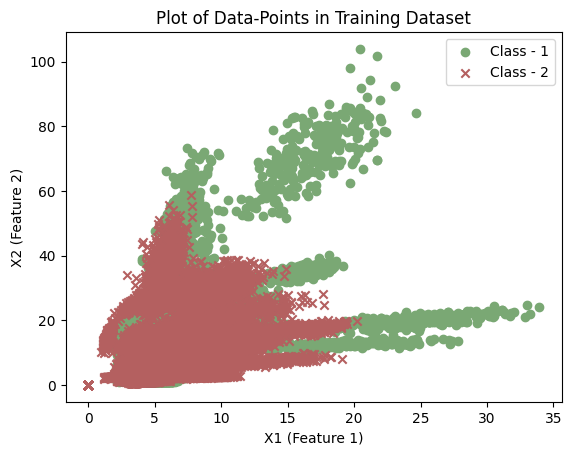

In [18]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

mask = y_train_np == "e"

plt.scatter(X_train_np[mask, 8], X_train_np[mask, 9], c='#7AA874', marker = "o", label='Class - 1')
plt.scatter(X_train_np[~mask, 8], X_train_np[~mask, 9], c='#B46060', marker = "x", label='Class - 2')

# Add legend to the plot
plt.legend()

# Added a Title.
plt.title("Plot of Data-Points in Training Dataset")

# Setting the X and Y Axes.
plt.xlabel("X1 (Feature 1)")
plt.ylabel("X2 (Feature 2)")

# Display the plot
plt.show()


## Encoding the Categorical Features using Statistical Methods ["mean", "max", "min", "median"]

In [23]:
enc_train_data = StatisticalEncoding(dataFrame=train_data, categoricalFeatures=categoricalFeatures, numericalFeatures=numericalFeatures)

# Update X_train_enc and y_train_enc with enc_train_data
# Updating X_train and y_train.
X_train_enc = enc_train_data.drop('class', axis=1)  # Select all the features except labels,
y_train_enc = enc_train_data['class']  # Select only the 'class' column.

print(f"Shape of Training Data after performing Statistical Encoding: {enc_train_data.shape}")
print(f"Number of Data-Points before performing Statistical Encoding: {train_data.shape[0]} records")
print(f"Number of Data-Points after performing Statistical Encoding: {enc_train_data.shape[0]} records")

Shape of Training Data after performing Statistical Encoding: (42660, 148)
Number of Data-Points before performing Statistical Encoding: 42660 records
Number of Data-Points after performing Statistical Encoding: 42660 records


In [22]:
enc_train_data.head()

,cap-diameter,stem-height,stem-width,cap-shape_cap-diameter_mean,cap-shape_cap-diameter_min,cap-shape_cap-diameter_max,cap-shape_cap-diameter_median,cap-shape_stem-height_mean,cap-shape_stem-height_min,cap-shape_stem-height_max,...,season_cap-diameter_median,season_stem-height_mean,season_stem-height_min,season_stem-height_max,season_stem-height_median,season_stem-width_mean,season_stem-width_min,season_stem-width_max,season_stem-width_median,class
0,4.98,6.04,6.21,3.781002,0.55,7.89,4.25,6.411460,2.24,15.07,...,6.06,6.666083,0.0,33.92,6.01,12.087907,0.0,101.69,10.66,p
1,2.84,5.66,3.55,6.671073,0.38,30.48,6.27,6.849409,1.20,24.63,...,5.63,6.613699,0.0,33.03,5.91,11.871272,0.0,103.91,9.33,p
2,11.44,7.03,25.29,6.671073,0.38,30.48,6.27,6.849409,1.20,24.63,...,6.54,6.428729,0.0,27.36,6.02,13.801794,0.0,70.02,10.89,e
3,8.77,4.44,13.61,7.477626,1.03,25.60,6.83,5.541955,1.92,11.50,...,6.06,6.666083,0.0,33.92,6.01,12.087907,0.0,101.69,10.66,p
4,7.55,8.41,18.44,6.671073,0.38,30.48,6.27,6.849409,1.20,24.63,...,6.06,6.666083,0.0,33.92,6.01,12.087907,0.0,101.69,10.66,e


In [ ]:
enc_train_data.to_csv("./dataset/mushroom_train_v1.csv")

## 